![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **MULTIPLE LINEAR REGRESSION FOR FINANCIAL DATA USING PYTHON**

## **¿What is multiple linear regression?**

<font size="3"> In this notebook we will talk about multiple linear regression for financial data using python. Linear regression is a linear model, e.g. a model that assumes a linear relationship between the input variables (x) and the single output variable (y). More specifically, that y can be calculated from a linear combination of the input variables (x). Please look  <a href="https://quant-trading.co/linear-regression-for-financial-data-using-python/" target="_blank">here.</a> if you want to get familiar with simple linear regression before jumping in in this case which is more general.<BR>

## Import all required libraries

<font size="3"> As usual, the first step is to import all the requires libraries.<BR>

In [1]:
import warnings
warnings.filterwarnings('ignore')

#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
from scipy import stats
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.stats.diagnostic import het_white
from numpy.linalg import eigvals


import requests
import os
import io

<BR><BR>

## Download data for the multiple linear regression

<font size="3"> In a previous <a href="https://quant-trading.co/linear-regression-for-financial-data-using-python/" target="_blank">notebook</a> where we explained simple linear regression, we worked with data from the World Bank. That is a fantastic API where you can get data from all countries and for a lot of differente variables. If you want to learn how to download that data using python code, please look <a href="https://quant-trading.co/how-to-download-data-from-world-bank-api/" target="_blank">here.</a><BR>
    
<font size="3"> Now we are using the data from the OECD API. You can download that data easily too, using python code as we explain <a href="https://quant-trading.co/how-to-download-data-oecd-database" target="_blank">here</a>. Remember that our goal in this notebook is to explain how to perform a multiple linear regression for financial data using python code.<BR>
    
<font size="3"> We are interested in tracking the relationship that exists between long-term interest rates (as measured by long-term yields on government bonds) with inflation, fiscal balance and some other variables. Intuitively you would expect higher long-term rates when inflation is high. The relationship with fiscal balance should work in an inverse manner. The higher the fiscal balance (which means a positive one) the lower the long-term interest rate. Remember that in this notebook we are learning how to perform multiple linear regression for financial data using python<BR>
    
<font size="3"> In the script below you can observe how to download data for long term rates for all OECD countries since 1955. The data is collected annualy<BR>
    

In [2]:
#Annual Long term interest rate data
database = '@DF_FINMARK,4.0' 
country_code = 'USA+GBR+TUR+CHE+SWE+ESP+SVN+SVK+POL+PRT+NOR+NZL+NLD+MEX+LUX+LTU+LVA+KOR+JPN+ITA+ISR+IRL+ISL+HUN+GRC+DEU+FRA+FIN+DNK+EST+CZE+CRI+COL+CHL+CAN+BEL+AUT+AUS' 
frequency = 'A' 
indicator = 'IRLT' 
unit_of_measure = 'PA' 
start_period = '1955' 
query_text = database+"/"+country_code+"."+frequency+"."+indicator+"."+unit_of_measure+".....?startPeriod="+start_period+"&dimensionAtObservation=AllDimensions" 
url = f"https://sdmx.oecd.org/public/rest/data/OECD.SDD.STES,DSD_STES{query_text}" 
headers = { 'User-Agent': 'Mozilla/5.0','Accept': 'application/vnd.sdmx.data+csv; charset=utf-8' } 
download = requests.get(url = url,headers = headers)

df2 = pd.read_csv(io.StringIO(download.text)) 
df2.head(10)

,DATAFLOW,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,ACTIVITY,ADJUSTMENT,TRANSFORMATION,TIME_HORIZ,METHODOLOGY,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
0,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),DEU,A,IRLT,PA,_Z,_Z,_Z,_Z,N,1969,6.841667,A,0,2,NaN
1,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),DEU,A,IRLT,PA,_Z,_Z,_Z,_Z,N,1970,8.316667,A,0,2,NaN
2,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),NOR,A,IRLT,PA,_Z,_Z,_Z,_Z,N,1987,13.305000,A,0,2,NaN
3,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),NOR,A,IRLT,PA,_Z,_Z,_Z,_Z,N,1988,12.895830,A,0,2,NaN
4,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),NOR,A,IRLT,PA,_Z,_Z,_Z,_Z,N,1989,10.825830,A,0,2,NaN
5,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),DEU,A,IRLT,PA,_Z,_Z,_Z,_Z,N,1962,5.908333,A,0,2,NaN
6,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),DEU,A,IRLT,PA,_Z,_Z,_Z,_Z,N,1963,6.050000,A,0,2,NaN
7,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),NOR,A,IRLT,PA,_Z,_Z,_Z,_Z,N,1992,9.606667,A,0,2,NaN
8,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),NOR,A,IRLT,PA,_Z,_Z,_Z,_Z,N,1993,6.880833,A,0,2,NaN
9,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),NOR,A,IRLT,PA,_Z,_Z,_Z,_Z,N,1994,7.435833,A,0,2,NaN


<BR><BR>
<font size="3"> We can filter the information and get an intuition of what we observe. For example, below is a chart of this information for the United States. You can see that long-term insterest rates varied from 0 to 14 percent throughout the years <BR>
    

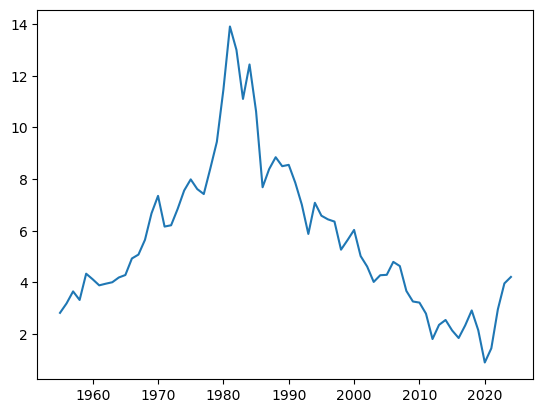

In [3]:
df_USA_long_rate = df2.loc[df2['REF_AREA'] == 'USA']
df_USA_long_rate.sort_values(by='TIME_PERIOD',inplace=True)
plt.plot(df_USA_long_rate['TIME_PERIOD'],df_USA_long_rate['OBS_VALUE'])

<BR><BR>
<font size="3"> We can perform a similar procedure for inflation and fiscal balance as shown below:<BR>
    

In [4]:
#Annual inflation data 

url = f"https://sdmx.oecd.org/public/rest/data/OECD.SDD.TPS,DSD_PRICES@DF_PRICES_N_TXCP01_NRG,1.0/USA+GBR+TUR+CHE+SWE+ESP+SVN+SVK+POL+PRT+NOR+NZL+NLD+MEX+LUX+LTU+LVA+KOR+JPN+ITA+ISR+IRL+ISL+HUN+GRC+DEU+FRA+FIN+DNK+EST+CZE+CRI+COL+CHL+CAN+BEL+AUT+AUS.A......?startPeriod=1956&endPeriod=2025&dimensionAtObservation=AllDimensions"

headers = { 'User-Agent': 'Mozilla/5.0','Accept': 'application/vnd.sdmx.data+csv; charset=utf-8' } 
download = requests.get(url = url,headers = headers)

df3 = pd.read_csv(io.StringIO(download.text)) 
df3.head(10)

,DATAFLOW,REF_AREA,FREQ,METHODOLOGY,MEASURE,UNIT_MEASURE,EXPENDITURE,ADJUSTMENT,TRANSFORMATION,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,BASE_PER,DURABILITY,DECIMALS
0,OECD.SDD.TPS:DSD_PRICES@DF_PRICES_N_TXCP01_NRG...,ISR,A,N,CPI,PA,_TXCP01_NRG,N,GY,2023,4.157393,A,NaN,NaN,NaN,2
1,OECD.SDD.TPS:DSD_PRICES@DF_PRICES_N_TXCP01_NRG...,ISR,A,N,CPI,PA,_TXCP01_NRG,N,GY,2022,3.961129,A,NaN,NaN,NaN,2
2,OECD.SDD.TPS:DSD_PRICES@DF_PRICES_N_TXCP01_NRG...,ISR,A,N,CPI,PA,_TXCP01_NRG,N,GY,1976,32.309100,A,NaN,NaN,NaN,2
3,OECD.SDD.TPS:DSD_PRICES@DF_PRICES_N_TXCP01_NRG...,ISR,A,N,CPI,PA,_TXCP01_NRG,N,GY,1975,36.150670,A,NaN,NaN,NaN,2
4,OECD.SDD.TPS:DSD_PRICES@DF_PRICES_N_TXCP01_NRG...,ISR,A,N,CPI,PA,_TXCP01_NRG,N,GY,1974,36.344800,A,NaN,NaN,NaN,2
5,OECD.SDD.TPS:DSD_PRICES@DF_PRICES_N_TXCP01_NRG...,ISR,A,N,CPI,PA,_TXCP01_NRG,N,GY,1973,20.169540,A,NaN,NaN,NaN,2
6,OECD.SDD.TPS:DSD_PRICES@DF_PRICES_N_TXCP01_NRG...,ISR,A,N,CPI,PA,_TXCP01_NRG,N,GY,1972,14.631820,A,NaN,NaN,NaN,2
7,OECD.SDD.TPS:DSD_PRICES@DF_PRICES_N_TXCP01_NRG...,ISR,A,N,CPI,PA,_TXCP01_NRG,N,GY,1971,11.673500,A,NaN,NaN,NaN,2
8,OECD.SDD.TPS:DSD_PRICES@DF_PRICES_N_TXCP01_NRG...,ISR,A,N,CPI,PA,_TXCP01_NRG,N,GY,1990,19.280570,A,NaN,NaN,NaN,2
9,OECD.SDD.TPS:DSD_PRICES@DF_PRICES_N_TXCP01_NRG...,ISR,A,N,CPI,PA,_TXCP01_NRG,N,GY,1989,19.313300,A,NaN,NaN,NaN,2


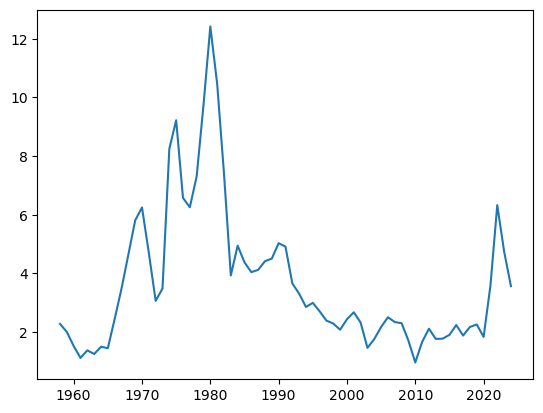

In [5]:
df_USA_inflation = df3.loc[df3['REF_AREA'] == 'USA']
df_USA_inflation.sort_values(by='TIME_PERIOD',inplace=True)
plt.plot(df_USA_inflation['TIME_PERIOD'],df_USA_inflation['OBS_VALUE'])

In [6]:
#Annual Government Fiscal Balance

url = f"https://sdmx.oecd.org/public/rest/data/OECD.GOV.GIP,DSD_GOV@DF_GOV_PF_YU,1.0/A.USA+GBR+TUR+CHE+SWE+ESP+SVN+SVK+PRT+POL+NOR+NZL+NLD+MEX+LUX+LTU+LVA+KOR+JPN+ITA+ISR+IRL+ISL+HUN+GRC+DEU+FRA+FIN+EST+DNK+CZE+CRI+COL+CHL+CAN+BEL+AUS+AUT.GNLB.PT_B1GQ...?startPeriod=2007&endPeriod=2023&dimensionAtObservation=AllDimensions"

headers = { 'User-Agent': 'Mozilla/5.0','Accept': 'application/vnd.sdmx.data+csv; charset=utf-8' } 
download = requests.get(url = url,headers = headers)

df4 = pd.read_csv(io.StringIO(download.text)) 
df4.head(10)

,DATAFLOW,FREQ,REF_AREA,MEASURE,UNIT_MEASURE,SECTOR,EDITION,CATEGORY,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,PRICE_BASE,BASE_PER
0,OECD.GOV.GIP:DSD_GOV@DF_GOV_PF_YU(1.0),A,ISR,GNLB,PT_B1GQ,S13,YU,PF,2018,-3.548,A,0,_Z,NaN
1,OECD.GOV.GIP:DSD_GOV@DF_GOV_PF_YU(1.0),A,ISR,GNLB,PT_B1GQ,S13,YU,PF,2019,-3.773,A,0,_Z,NaN
2,OECD.GOV.GIP:DSD_GOV@DF_GOV_PF_YU(1.0),A,ISR,GNLB,PT_B1GQ,S13,YU,PF,2020,-10.640,A,0,_Z,NaN
3,OECD.GOV.GIP:DSD_GOV@DF_GOV_PF_YU(1.0),A,GRC,GNLB,PT_B1GQ,S13,YU,PF,2019,0.824,A,0,_Z,NaN
4,OECD.GOV.GIP:DSD_GOV@DF_GOV_PF_YU(1.0),A,GRC,GNLB,PT_B1GQ,S13,YU,PF,2020,-9.561,A,0,_Z,NaN
5,OECD.GOV.GIP:DSD_GOV@DF_GOV_PF_YU(1.0),A,GRC,GNLB,PT_B1GQ,S13,YU,PF,2021,-6.927,A,0,_Z,NaN
6,OECD.GOV.GIP:DSD_GOV@DF_GOV_PF_YU(1.0),A,FRA,GNLB,PT_B1GQ,S13,YU,PF,2022,-4.736,A,0,_Z,NaN
7,OECD.GOV.GIP:DSD_GOV@DF_GOV_PF_YU(1.0),A,FRA,GNLB,PT_B1GQ,S13,YU,PF,2023,-5.486,A,0,_Z,NaN
8,OECD.GOV.GIP:DSD_GOV@DF_GOV_PF_YU(1.0),A,FRA,GNLB,PT_B1GQ,S13,YU,PF,2007,-2.990,A,0,_Z,NaN
9,OECD.GOV.GIP:DSD_GOV@DF_GOV_PF_YU(1.0),A,GRC,GNLB,PT_B1GQ,S13,YU,PF,2009,-15.424,A,0,_Z,NaN


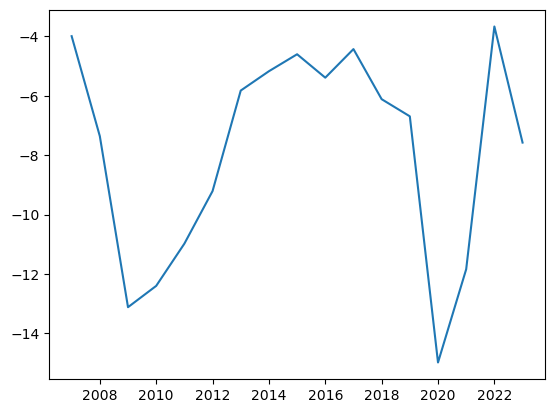

In [7]:
df_USA_fiscal_balance = df4.loc[df4['REF_AREA'] == 'USA']
df_USA_fiscal_balance.sort_values(by='TIME_PERIOD',inplace=True)
plt.plot(df_USA_fiscal_balance['TIME_PERIOD'],df_USA_fiscal_balance['OBS_VALUE'])

<BR><BR>

## Time series or cross-sectional data for multiple linear regression?

<font size="3"> Linear regression is traditionally used for cross-sectional data. In future notebooks, we will show how to apply the procedure for time series. The charts you observed before showed times series data. However, to be consistent with the methodology that we showed <a href="https://quant-trading.co/linear-regression-for-financial-data-using-python/" target="_blank">here</a> it is better to work with cross-sectional data. This means, we will choose a particular year and work with the data we have for all countries in that particular year. Below, we show how to do that for year 2019.<BR>

In [8]:
df_2019_long_rate = df2.loc[df2['TIME_PERIOD'] == 2019]
df_2019_inflation = df3.loc[df3['TIME_PERIOD'] == 2019]
df_2019_fiscal_balance = df4.loc[df4['TIME_PERIOD'] == 2019]

In [9]:
df_2019_long_rate.head(10)

,DATAFLOW,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,ACTIVITY,ADJUSTMENT,TRANSFORMATION,TIME_HORIZ,METHODOLOGY,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER
33,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),NOR,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,1.494167,A,0,2,NaN
66,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),SWE,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,0.093758,A,0,2,NaN
121,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),FRA,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,0.130283,A,0,2,NaN
156,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUT,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,0.062933,A,0,2,NaN
214,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),USA,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,2.144167,A,0,2,NaN
245,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),PRT,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,0.757500,A,0,2,NaN
300,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,1.497083,A,0,2,NaN
347,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),COL,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,6.497500,A,0,2,NaN
371,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),CZE,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,1.548116,A,0,2,NaN
425,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),IRL,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,0.331058,A,0,2,NaN


<BR><BR>

<font size="3"> Now, we proceed to merge the data and put it into a single dataframe.<BR>

In [10]:
df_total = pd.merge(df_2019_long_rate, df_2019_inflation[['REF_AREA','OBS_VALUE']],left_on = 'REF_AREA', right_on = 'REF_AREA', how = 'left')
df_total = pd.merge(df_total, df_2019_fiscal_balance[['REF_AREA','OBS_VALUE']],left_on = 'REF_AREA', right_on = 'REF_AREA', how = 'left')
df_total = df_total.rename(columns={'OBS_VALUE_x': 'long_term_rate', 'OBS_VALUE_y': 'inflation','OBS_VALUE': 'fiscal_balance'})
df_total.head(10)

,DATAFLOW,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,ACTIVITY,ADJUSTMENT,TRANSFORMATION,TIME_HORIZ,METHODOLOGY,TIME_PERIOD,long_term_rate,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER,inflation,fiscal_balance
0,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),NOR,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,1.494167,A,0,2,NaN,2.340820,6.522
1,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),SWE,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,0.093758,A,0,2,NaN,1.519436,0.439
2,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),FRA,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,0.130283,A,0,2,NaN,0.784748,-2.394
3,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUT,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,0.062933,A,0,2,NaN,1.653481,0.536
4,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),USA,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,2.144167,A,0,2,NaN,2.254087,-6.693
5,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),PRT,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,0.757500,A,0,2,NaN,0.488877,0.116
6,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,1.497083,A,0,2,NaN,1.703054,-6.795
7,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),COL,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,6.497500,A,0,2,NaN,3.091256,-4.085
8,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),CZE,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,1.548116,A,0,2,NaN,2.521405,0.283
9,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),IRL,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2019,0.331058,A,0,2,NaN,1.135042,0.409


<BR><BR>
    
## Long-term rates and inflation

<font size="3"> Here we observe the relationship between long-term rates and inflation for 2019.<BR>

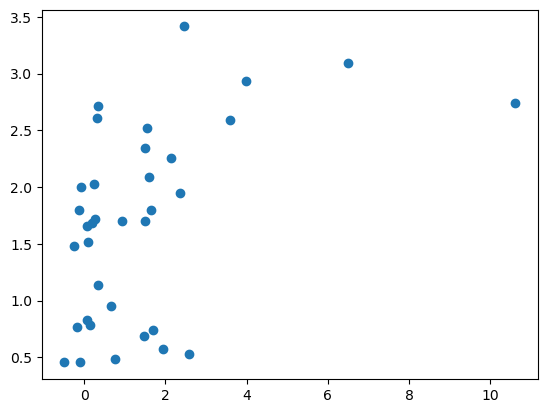

In [11]:
plt.scatter(df_total['long_term_rate'],df_total['inflation'])

<BR><BR>
    
## Long-term rates and fiscal balance

<font size="3"> Here we observe the relationship between long-term rates and fiscal balance for 2019.<BR>

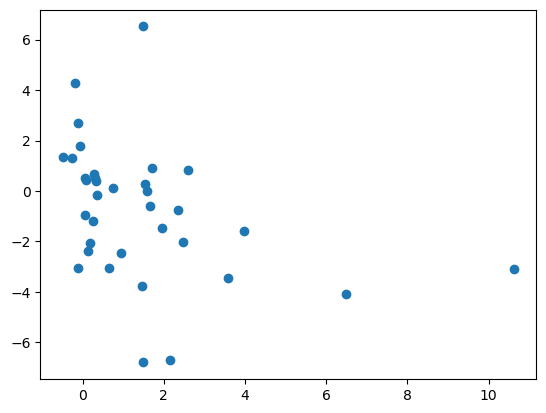

In [12]:
plt.scatter(df_total['long_term_rate'],df_total['fiscal_balance'])

<BR><BR>
    
## Do the same for any year you would like to track

<font size="3"> Below we write a short script that allows you track any particular year you want. In this case, we are repeating the procedure for 2023 and see the relationships that we get.<BR>

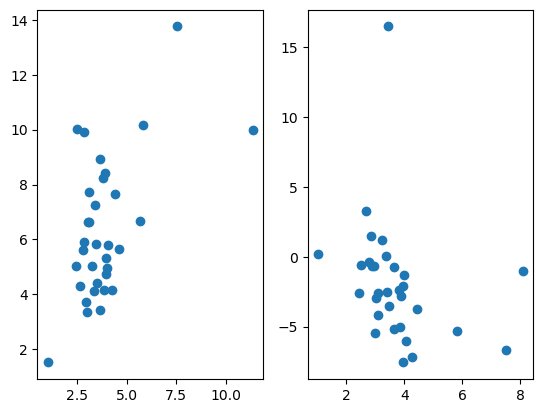

In [13]:
my_year = 2023

df_my_year_long_rate = df2.loc[df2['TIME_PERIOD'] == my_year]
df_my_year_inflation = df3.loc[df3['TIME_PERIOD'] == my_year]
df_my_year_fiscal_balance = df4.loc[df4['TIME_PERIOD'] == my_year]

df_total = pd.merge(df_my_year_long_rate, df_my_year_inflation[['REF_AREA','OBS_VALUE']],left_on = 'REF_AREA', right_on = 'REF_AREA', how = 'left')
df_total = pd.merge(df_total, df_my_year_fiscal_balance[['REF_AREA','OBS_VALUE']],left_on = 'REF_AREA', right_on = 'REF_AREA', how = 'left')
df_total = df_total.rename(columns={'OBS_VALUE_x': 'long_term_rate', 'OBS_VALUE_y': 'inflation','OBS_VALUE': 'fiscal_balance'})

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.scatter(df_total['long_term_rate'],df_total['inflation'])

ax2 = fig.add_subplot(1, 2, 2)
ax2.scatter(df_total['long_term_rate'],df_total['fiscal_balance'])

<br><br>
<font size="3">
It seems that for year 2023 the relationship looks much more linear than before. This looks promising! <br><br> Let's jump into modelling these variables immediately using multiple linear regression. The first model we can build is a simple regression model that tracks the relationship between long-term rates and inflation. Let's analyze that model:
</font><br><br>

In [14]:
#Create a linear model - model1
model1 = 'long_term_rate ~ inflation'
lm1   = sm.ols(formula = model1, data = df_total).fit()
print('LINEAR REGRESSION - MODEL1')
print(lm1.summary())

LINEAR REGRESSION - MODEL1
                            OLS Regression Results                            
Dep. Variable:         long_term_rate   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.270
Method:                 Least Squares   F-statistic:                     12.85
Date:                Fri, 07 Mar 2025   Prob (F-statistic):            0.00114
Time:                        11:39:46   Log-Likelihood:                -59.144
No. Observations:                  33   AIC:                             122.3
Df Residuals:                      31   BIC:                             125.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5194    

<br><br>
<font size="3">
You can see that inflation is a significant variable, or put in other words, it does explain long-term rates. Before we continue, you should remember three of the main assumptions of linear regression:
</font><br><br>


***
1. The mean value of the residuals is cero.
2. The variance of the residuals is constant.
3. The residuals are not auto-correlated.
***


<font size="3"> 
Furthermore, if residuals are normal and indepently distributed, assumptions 1, 2 and 3 hold. Please remember that a good way to check if residuals are normal, is using a QQ-plot. If residuals come from a normal distribution, we should see the points forming a line that's roughly straight. Let's check:
<br><br>
</font>

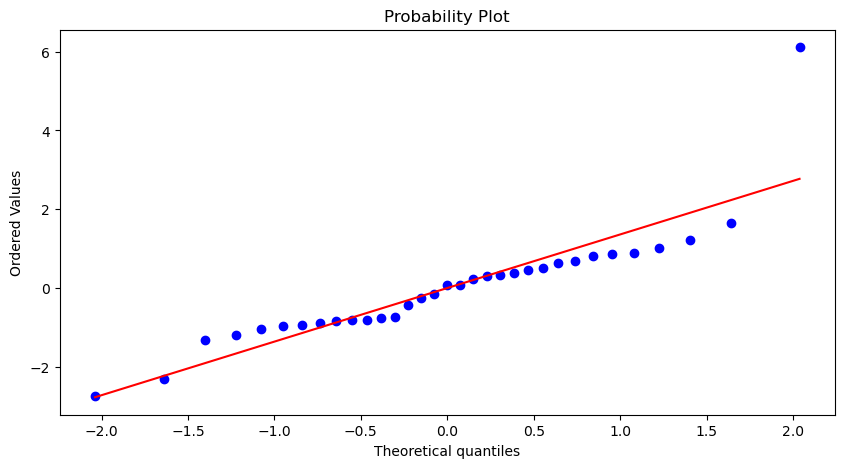

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(10,5))
stats.probplot(x=lm1.resid, dist = "norm", plot = ax)
plt.show()

<br><br>
<font size="3">
If we want to be more rigurous, we can perform a normal test and inspect its p-value. Please look that in this case the p-value is very is small, thus we can reject the null hypothesis that states the residuals are normally distributed. 
</font><br><br>

In [16]:
res = stats.normaltest(lm1.resid)
res.pvalue

1.9150904277399387e-07

<br><br>
<font size="3">
Since residuals are not normal we can check each assumption separately. The first one is to see if residuals have a mean equal to zero. That is indeed the case as you can see below:
</font><br><br>

The mean value of the residuals is-1.2515241368501765e-15


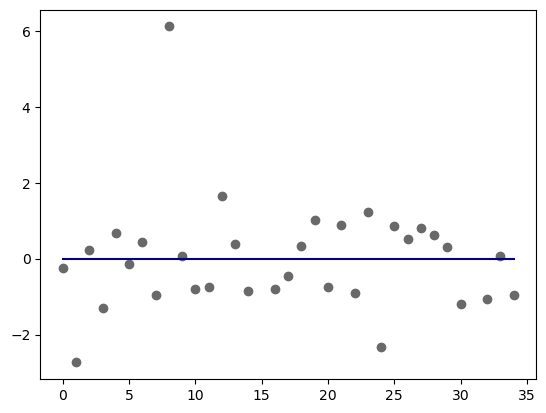

In [17]:
#Plot the residuals
plt.plot(lm1.resid.index,lm1.resid.values,marker='o',linestyle='None',color='dimgrey');
plt.plot(lm1.resid.index,lm1.resid.mean()*np.ones(len(lm1.resid)),color='darkblue');
print("The mean value of the residuals is" +str(lm1.resid.mean()))

<br><br>
<font size="3">
Next we would like to see if variance is constant. To visualize that, we can plot the residuals against the values of the independent variable. In general, we can observe that variance doesn't increase with the level of inflation. Hence, we could say that heteroskedaticity is not present. 
</font><br><br>

<AxesSubplot: xlabel='inflation', ylabel='Residuals'>

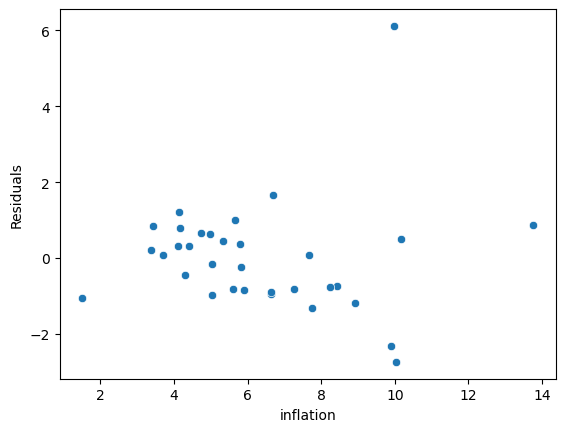

In [18]:
data_clean = df_total.dropna(subset=['inflation']).copy()
data_clean['Residuals']=lm1.resid.values
sns.scatterplot(x='inflation',y='Residuals',data=data_clean)

<br><br>
<font size="3">
However, if we want to be more rigurous, we can perform a heteroskedaticity test known as white-test and inspect its p-value. Please look that in this case the p-value is not small, thus we cannot reject the null hypothesis that states the residuals have homoskedaticity.  Sor far, so good.
</font><br><br>

In [19]:
#perform White's test
white_test = het_white(lm1.resid,  lm1.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 3.8777866600123145, 'Test Statistic p-value': 0.14386307065783047, 'F-Statistic': 1.997334447801601, 'F-Test p-value': 0.15334039849635073}


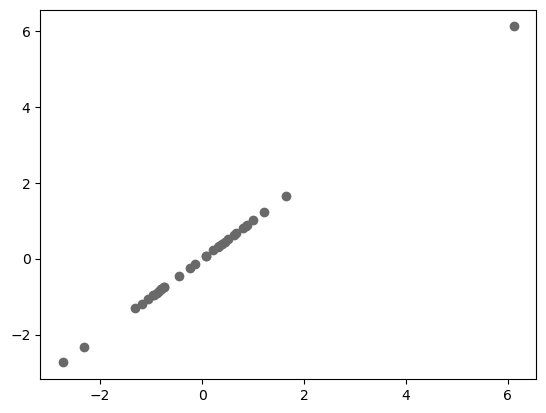

In [20]:
plt.plot(lm1.resid.values,lm1.resid.values,marker='o',linestyle='None',color='dimgrey');

<br><br>
<font size="3">
The last thing we should look for, based on the three main assumptions we have already talked about, is autocorrelation. Although you can look for autocorrelation in cross-sectional data (it is known as spatial autocorrelation), this is something people normally look in when dealing with time series data. So, we won't check it in this case. 
</font><br><br>

<font size="3">
What we will do now is to run a model where we use the fiscal balance as an independent variable alone. As you can observe below, in this case the independent variable is not significant. 
</font><br><br>

In [21]:
#Create a linear model - model2
model2 = 'long_term_rate ~ fiscal_balance'
lm2   = sm.ols(formula = model2, data = df_total).fit()
print('LINEAR REGRESSION - MODEL2')
print(lm2.summary())

LINEAR REGRESSION - MODEL2
                            OLS Regression Results                            
Dep. Variable:         long_term_rate   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     2.326
Date:                Fri, 07 Mar 2025   Prob (F-statistic):              0.138
Time:                        11:39:47   Log-Likelihood:                -51.914
No. Observations:                  31   AIC:                             107.8
Df Residuals:                      29   BIC:                             110.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        

<br><br>
<font size="3">
What happens if we include not only fiscal balance but also inflation in the model. We see that the p-value for fiscal balance goes down by almost a half. It is significant at the 7% level approximately. Here, we see that when multiple linear regression for financial data using python, some variables can be significant when included with other variables.
</font><br><br>

In [22]:
#Create a linear model - model3
model3 = 'long_term_rate ~ inflation + fiscal_balance'
lm3   = sm.ols(formula = model3, data = df_total).fit()
print('LINEAR REGRESSION - MODEL3')
print(lm3.summary())

LINEAR REGRESSION - MODEL3
                            OLS Regression Results                            
Dep. Variable:         long_term_rate   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     9.850
Date:                Fri, 07 Mar 2025   Prob (F-statistic):           0.000613
Time:                        11:39:47   Log-Likelihood:                -36.940
No. Observations:                  30   AIC:                             79.88
Df Residuals:                      27   BIC:                             84.08
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        

<br><br>
<font size="3">
A $R^2$ of 42.2% using only two variables isn't bad at all. We could think of adding new variables and see if this number increases. Let's add the current account balance and see if we get a better model. Theoretically, the stronger the current account balance, the less risky the country is to foreign shocks. Therefore one could expect lower long-term rates. we can download that information using the following script. Then we will merge the database.
</font><br><br>

In [23]:
# Annual Current Account Balance

url = f"https://sdmx.oecd.org/public/rest/data/OECD.SDD.TPS,DSD_BOP@DF_BOP,1.0/GBR+TUR+CHE+SWE+SVN+ESP+SVK+PRT+POL+NOR+NZL+NLD+MEX+LUX+LTU+LVA+KOR+JPN+ITA+ISR+IRL+ISL+HUN+GRC+DEU+FRA+EST+FIN+DNK+CZE+CRI+COL+CHL+CAN+BEL+AUT+AUS+USA..CA.B..A.PT_B1GQ.Y?startPeriod=2020&dimensionAtObservation=AllDimensions"

headers = { 'User-Agent': 'Mozilla/5.0','Accept': 'application/vnd.sdmx.data+csv; charset=utf-8' } 
download = requests.get(url = url,headers = headers)

df5 = pd.read_csv(io.StringIO(download.text)) 
df5.head(10)

,DATAFLOW,REF_AREA,COUNTERPART_AREA,MEASURE,ACCOUNTING_ENTRY,FS_ENTRY,FREQ,UNIT_MEASURE,ADJUSTMENT,TIME_PERIOD,OBS_VALUE,OBS_STATUS,UNIT_MULT,CURRENCY,DECIMALS
0,OECD.SDD.TPS:DSD_BOP@DF_BOP(1.0),CAN,WXD,CA,B,T,A,PT_B1GQ,Y,2022,-0.299856,A,0,_Z,2
1,OECD.SDD.TPS:DSD_BOP@DF_BOP(1.0),DNK,WXD,CA,B,T,A,PT_B1GQ,Y,2020,8.060225,A,0,_Z,2
2,OECD.SDD.TPS:DSD_BOP@DF_BOP(1.0),SVK,WXD,CA,B,T,A,PT_B1GQ,Y,2023,-1.449142,A,0,_Z,2
3,OECD.SDD.TPS:DSD_BOP@DF_BOP(1.0),AUS,WXD,CA,B,T,A,PT_B1GQ,Y,2024,-1.926948,A,0,_Z,2
4,OECD.SDD.TPS:DSD_BOP@DF_BOP(1.0),AUS,WXD,CA,B,T,A,PT_B1GQ,Y,2023,-0.293372,A,0,_Z,2
5,OECD.SDD.TPS:DSD_BOP@DF_BOP(1.0),AUS,WXD,CA,B,T,A,PT_B1GQ,Y,2022,0.370913,A,0,_Z,2
6,OECD.SDD.TPS:DSD_BOP@DF_BOP(1.0),USA,WXD,CA,B,T,A,PT_B1GQ,Y,2021,-3.665275,A,0,_Z,2
7,OECD.SDD.TPS:DSD_BOP@DF_BOP(1.0),USA,WXD,CA,B,T,A,PT_B1GQ,Y,2020,-2.815388,A,0,_Z,2
8,OECD.SDD.TPS:DSD_BOP@DF_BOP(1.0),MEX,WXD,CA,B,T,A,PT_B1GQ,Y,2020,2.496241,A,0,_Z,2
9,OECD.SDD.TPS:DSD_BOP@DF_BOP(1.0),CRI,WXD,CA,B,T,A,PT_B1GQ,Y,2023,-1.424593,A,0,_Z,2


In [24]:
df_my_year_current_account_balance = df5.loc[df5['TIME_PERIOD'] == my_year]

df_total = pd.merge(df_total, df_my_year_current_account_balance[['REF_AREA','OBS_VALUE']],left_on = 'REF_AREA', right_on = 'REF_AREA', how = 'left')
df_total = df_total.rename(columns={'OBS_VALUE': 'current_account_balance'})
df_total.head(10)

,DATAFLOW,REF_AREA,FREQ,MEASURE,UNIT_MEASURE,ACTIVITY,ADJUSTMENT,TRANSFORMATION,TIME_HORIZ,METHODOLOGY,TIME_PERIOD,long_term_rate,OBS_STATUS,UNIT_MULT,DECIMALS,BASE_PER,inflation,fiscal_balance,current_account_balance
0,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),NOR,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2023,3.443135,A,0,2,NaN,5.827294,16.490,16.623790
1,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),SWE,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2023,2.509334,A,0,2,NaN,10.024480,-0.624,6.845509
2,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),FRA,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2023,2.994167,A,0,2,NaN,3.369548,-5.486,-1.055965
3,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUT,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2023,3.082675,A,0,2,NaN,7.740489,-2.620,1.589295
4,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),USA,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2023,3.957500,A,0,2,NaN,4.750814,-7.577,-3.266064
5,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),PRT,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2023,3.237500,A,0,2,NaN,5.023547,1.214,0.530025
6,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),AUS,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2023,3.942167,A,0,2,NaN,5.322322,-2.101,-0.293372
7,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),FIN,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2023,3.037500,A,0,2,NaN,6.644868,-2.990,-0.253790
8,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),COL,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2023,11.339170,A,0,2,NaN,9.978497,NaN,-2.301043
9,OECD.SDD.STES:DSD_STES@DF_FINMARK(4.0),CZE,A,IRLT,PA,_Z,_Z,_Z,_Z,N,2023,4.438432,A,0,2,NaN,7.669617,-3.781,0.066366


<br><br>
<font size="3">
In the following chart we can observe an inverse relationship between long-term rates and current account balance.
</font><br><br>

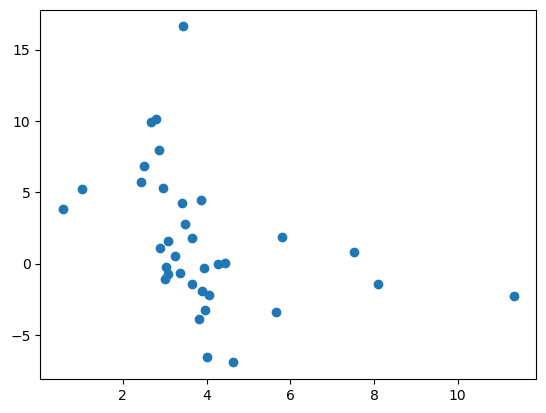

In [25]:
plt.scatter(df_total['long_term_rate'],df_total['current_account_balance'])

<br><br>
<font size="3">
If we run a linear regression using only the current account balance as an explanatory variable, we can observe that it is significant and that $R^2$ is close to 15%. This model is better than model than model 2, where we used the fiscal balance are the only explanatory variable. 
</font><br><br>

In [26]:
#Create a linear model - model4
model4 = 'long_term_rate ~ current_account_balance'
lm4   = sm.ols(formula = model4, data = df_total).fit()
print('LINEAR REGRESSION - MODEL4')
print(lm4.summary())

LINEAR REGRESSION - MODEL4
                            OLS Regression Results                            
Dep. Variable:         long_term_rate   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     5.602
Date:                Fri, 07 Mar 2025   Prob (F-statistic):             0.0240
Time:                        11:39:49   Log-Likelihood:                -69.521
No. Observations:                  35   AIC:                             143.0
Df Residuals:                      33   BIC:                             146.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

<br><br>
<font size="3">
Let's see what happens if we add together the three variables that we have already explored as explanatory ones.
</font><br><br>

In [27]:
#Create a linear model - model5
model5 = 'long_term_rate ~ inflation + fiscal_balance + current_account_balance'
lm5   = sm.ols(formula = model5, data = df_total).fit()
print('LINEAR REGRESSION - MODEL5')
print(lm5.summary())

LINEAR REGRESSION - MODEL5
                            OLS Regression Results                            
Dep. Variable:         long_term_rate   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     6.616
Date:                Fri, 07 Mar 2025   Prob (F-statistic):            0.00180
Time:                        11:39:49   Log-Likelihood:                -36.650
No. Observations:                  30   AIC:                             81.30
Df Residuals:                      26   BIC:                             86.90
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

<br><br>
<font size="3">
You can observe that the model doesn't perform very well. In this case, both the fiscal and current account balances are not significant, and $R^2$ is only a little bit higher. Sometimes this can happen when you add variables that have a high correlation. Multicollinearity arises when two or more independent variables in a model are highly correlated, leading to unreliable statistical inferences. This can be a big problem if you need to accurately to intepret your regression coefficients or if you need to test your confidence in them. 
</font><br><br>

<font size="3">
Multicollinearity affects regression analysis by creating problems when you're trying to estimate the relationship between the independent variables (the predictors) and the dependent variable (the outcome). Specifically, multicollinearity increases the variance of the coefficient estimates, making them sensitive to minor changes in the model or the data. When the coefficients become unstable, the standard errors become larger, which, in turn, can result in insignificant p-values even when the variables are truly important. It's important to know that multicollinearity doesn't affect the overall predictive power of the model. It does, however, affect the interpretation of the model because our model will have inflated errors and unstable estimates. We can check for correlation using the following script:
</font><br><br>

In [52]:
df_regressors = df_total[['inflation','fiscal_balance','current_account_balance']]
correlation_matrix = df_regressors.corr()
correlation_matrix

,inflation,fiscal_balance,current_account_balance
inflation,1.000000,-0.182673,-0.143542
fiscal_balance,-0.182673,1.000000,0.696677
current_account_balance,-0.143542,0.696677,1.000000


<br><br>

## AIC Criteria

<br>
<font size="3">
One of the properties of $R^2$ is that it can never decrease when the set of predictors is increased. In other words, there is no penalty for continuing to add variables to the model. Why do you think this may be a drawback of $R^2$? How would you go about deciding the correct set of predictors to use?

Since there is no penalty for continuing to add variables, we may end up using variables that have little explanatory power. Consequently, selecting predictor variables trying to maximize $R^2$ can lead to choosing unnecessarily complex and redundant models. This may lead to overfitting, thus losing the applicability of the model. Remember, "if we torture our data enough, it will talk".


One way we could avoid overfitting is by implementing a measure that penalizes for new added variables which lead to a small increase in $R^2$. We may try to create several linear models by removing one (or a subset) of the variables at a time and see how the $R^2$ behaves after the removal. If $R^2$ decreases below certain threshold we may consider keeping the corresponding variable(s), otherwise we drop the variable(s) as being not informative enough.

There are several model selection criteria that quantify the quality of a model by managing the tradeoff between goodness-of-fit and simplicity. The most common one is the **AIC (Akaike Information Criterion)**. The AIC penalizes the addition of more terms to a model, so in order for an updated model to have a better AIC, its $R^2$ needs to improve by at least as much as the additional imposed penalty. **Given several models**, the one with the lowest AIC is the recommended one.

Use the AIC score (you can look up this in the output of the model summary,  or by simply using (```mod.aic```) to evaluate whether or not the fit with the added square term is better than the previous model.
</font><br><br>

## Final remarks
<br>
<font size="3">
In this notebook we showed how to perform multiple linear regression for financial data using python. We showed how to assemble the data, check for the main assumptions and get a model to explain a particular variable.
<br><br>


<br><br>
<font size="3">
If this content is helpful and you want to make a donation please click on the button below. It helps us maintain this website.
</font><br><br>
    
[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)
